# Making a particle distribution.

We are going to look at two classes in particula, for this notebook. The first is `particle` and the second (`rates`) we'll use to move forward in time. 

So lets get those imported along with numpy and plotting.


In [2]:
# from particula import u
from particula import particle, rates
import numpy as np
import matplotlib

## ParticleDistribution

Lets just call this and see what we get.



In [3]:
default_distribution = particle.ParticleDistribution()

print("Radii")
default_distribution.pre_radius()[:10]

Radii


Magnitude,[4.1972292396604054e-08 4.216876899517281e-08 4.236524559374157e-08 4.256172219231033e-08 4.275819879087909e-08 4.295467538944785e-08 4.315115198801661e-08 4.3347628586585377e-08 4.3544105185154136e-08 4.3740581783722896e-08]
Units,meter


At every radius listed in `_.pre_radius()` is a probability of the particles at that radius. Thus, we have probability distribution function (PDF) of particles.

In [4]:
print("Particles PFD given radii.")
default_distribution.pre_distribution()[:10]

Particles PFD given radii.


Magnitude,[2200235960693703.8 2375247794883328.5 2562153632216260.0 2761608050637125.5 2974291484346663.0 3200910665710347.5 3442199044624819.5 3698917183754246.5 3971853128059254.0 4261822747056273.0]
Units,1/meter4


##Plot of particle PDF
Let's see what this particle PDF looks like now.

Note using `_.m` returns just the magnitude and drops the units.

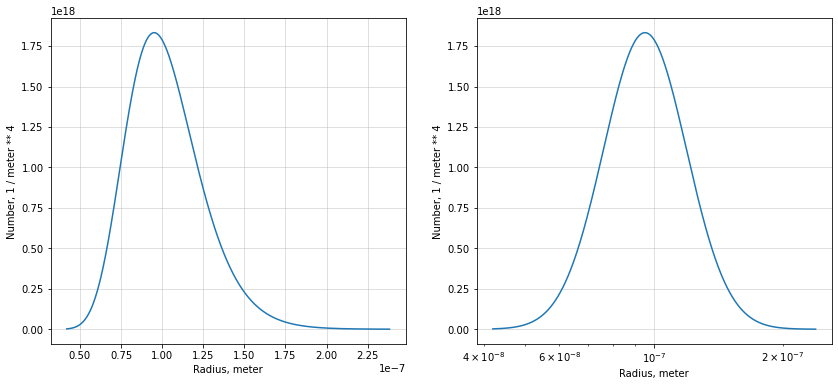

In [5]:
fig, ax= matplotlib.pyplot.subplots(1,2,figsize=[14,6])

#linear scale
ax[0].plot(default_distribution.pre_radius().m, default_distribution.pre_distribution().m)

ax[0].set_ylabel(f"Number, {default_distribution.pre_distribution().u}")
ax[0].set_xlabel(f"Radius, {default_distribution.pre_radius().u}")
ax[0].grid(True, alpha=0.5)

#log x
ax[1].semilogx(default_distribution.pre_radius().m, default_distribution.pre_distribution().m)

ax[1].set_ylabel(f"Number, {default_distribution.pre_distribution().u}")
ax[1].set_xlabel(f"Radius, {default_distribution.pre_radius().u}")
ax[1].grid(True, alpha=0.5)


## Summary statistics of a particle PDF.
As the keen eyed reader may have notice this is not a typical PDF and the maximunm is very large ($1.75*10^{18}$). Lets define some diagnostic functions and see what we get for the integral area.

In [6]:
def pdf_total(radius, pdf_distribution):
    return np.trapz(y=pdf_distribution, x=radius)

def pdf_volume_total(radius, pdf_distribution):
    return np.trapz(y=pdf_distribution* 4/3 * np.pi * radius**3, x=radius)

print(f'Total number of the PDF, {pdf_total(default_distribution.pre_radius(), default_distribution.pre_distribution())}')

print(f'Total volume of the PDF, {pdf_volume_total(default_distribution.pre_radius(), default_distribution.pre_distribution())}')

Total number of the PDF, 99989997132.11078 / meter ** 3
Total volume of the PDF, 5.237475060187453e-10 dimensionless




*   The integral area of the particle PDF is the total number of the distribution, $0.99*10^{12}~\#/m^3$.
*   Converting to volume PDF, the integral is the total volume of the particle distribution, $5*10^{-10}~m^3/m^3$.





That was defaults but, those might not work for you case so you can change the distribution properties using keyword argument. 

Note the line spacing is how the bin widths are space, for numerical efficiently in the coagulation calculation `linspace` is preferred over `logspace`.

For a complete list of the `kwargs` you can look at the XXX document. 

In [7]:
# around here, just define a kwargs

fine_mode = {
    "mode": 150e-9, # 200 nm median
    "nbins": 1000, # 1000 bins
    "nparticles": 1e8, # 1e4 #
    "volume": 1e-6, # per 1e-6 m^3 (or 1 cc)
    "gsigma": 1.25, # relatively narrow
    "spacing": "linspace", # bin spacing, 
}

coarse_mode = {
    "mode": 2000e-9, # 200 nm median
    "nbins": 1000, # 1000 bins
    "nparticles": 1e5, # 1e4 #
    "volume": 1e-6, # per 1e-6 m^3 (or 1 cc)
    "gsigma": 1.4, # relatively narrow
    "spacing": "linspace", # bin spacing, 
}

multi_mode = {
    "mode": [5000e-9, 50e-9, 300e-9], # 200 nm median
    "nbins": 1000, # 1000 bins
    "nparticles": [1e6,1e9,1e7], # 1e4 #
    "volume": 1e-6, # per 1e-6 m^3 (or 1 cc)
    "gsigma": [1.5,1.2,1.5], # relatively narrow
    "spacing": "logspace", # bin spacing, 
}


In [8]:
fine_mode_dist = particle.ParticleDistribution(**fine_mode) # pass the kwargs using ** prefix
coarse_mode_dist = particle.ParticleDistribution(**coarse_mode) 
multi_mode = particle.ParticleDistribution(**multi_mode) 

In [9]:
print(f'Total number of the PDF, {pdf_total(fine_mode_dist.pre_radius(), fine_mode_dist.pre_distribution())}')

print(f'Total volume of the PDF, {pdf_volume_total(fine_mode_dist.pre_radius(), fine_mode_dist.pre_distribution())}')
print(f'Total volume of the PDF, {pdf_volume_total(coarse_mode_dist.pre_radius(), coarse_mode_dist.pre_distribution())}')
print(f'Total volume of the PDF, {pdf_volume_total(multi_mode.pre_radius(), multi_mode.pre_distribution())}')

Total number of the PDF, 99989997132110.78 / meter ** 3
Total volume of the PDF, 1.7676478328132657e-06 dimensionless
Total volume of the PDF, 5.566386043732607e-06 dimensionless
Total volume of the PDF, 0.0003653651719983997 dimensionless


Let's see what we just made.

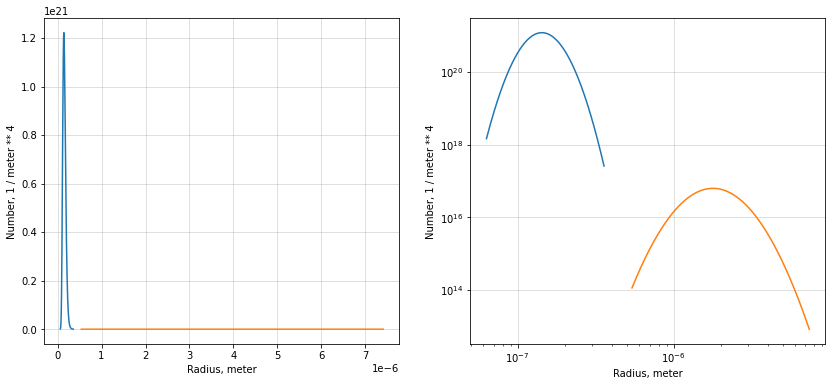

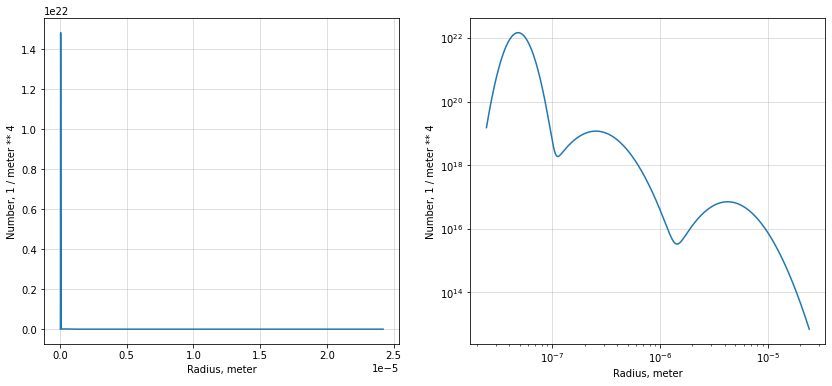

In [10]:
fig, ax= matplotlib.pyplot.subplots(1,2,figsize=[14,6])

ax[0].plot(fine_mode_dist.pre_radius().m, fine_mode_dist.pre_distribution().m)
ax[0].plot(coarse_mode_dist.pre_radius().m, coarse_mode_dist.pre_distribution().m)

ax[0].set_ylabel(f"Number, {fine_mode_dist.pre_distribution().u}")
ax[0].set_xlabel(f"Radius, {fine_mode_dist.pre_radius().u}")
ax[0].grid(True, alpha=0.5)

ax[1].loglog(fine_mode_dist.pre_radius().m, fine_mode_dist.pre_distribution().m)
ax[1].loglog(coarse_mode_dist.pre_radius().m, coarse_mode_dist.pre_distribution().m)

ax[1].set_ylabel(f"Number, {coarse_mode_dist.pre_distribution().u}")
ax[1].set_xlabel(f"Radius, {coarse_mode_dist.pre_radius().u}")
ax[1].grid(True, alpha=0.5)


fig, ax= matplotlib.pyplot.subplots(1,2,figsize=[14,6])

ax[0].plot(multi_mode.pre_radius().m, multi_mode.pre_distribution().m)

ax[0].set_ylabel(f"Number, {multi_mode.pre_distribution().u}")
ax[0].set_xlabel(f"Radius, {multi_mode.pre_radius().u}")
ax[0].grid(True, alpha=0.5)

ax[1].loglog(multi_mode.pre_radius().m, multi_mode.pre_distribution().m)

ax[1].set_ylabel(f"Number, {multi_mode.pre_distribution().u}")
ax[1].set_xlabel(f"Radius, {multi_mode.pre_radius().u}")
ax[1].grid(True, alpha=0.5)

## Coagulation Kernel
Now with particle number distribution we can calculated the coagulation rate, both the loss and gain in particle number. 

In [12]:
coarse_coag_loss = rates.Rates(**coarse_mode).coagulation_loss()
coarse_coag_gain = rates.Rates(**coarse_mode).coagulation_gain()

Then plotting the results, we see that smaller particles are lost and larger particles gain number

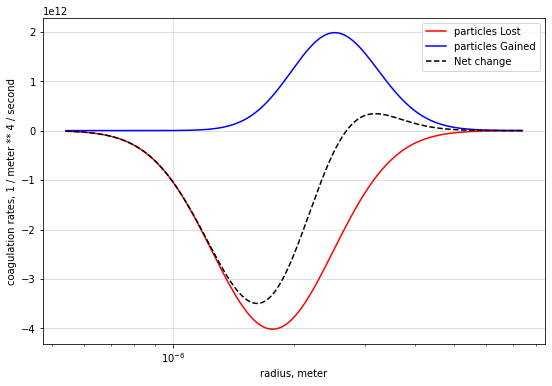

In [13]:
fig, ax= matplotlib.pyplot.subplots(1,1,figsize=[9,6])

# (2*(peak of original distribution)**3)**(1/3)

ax.semilogx(coarse_mode_dist.pre_radius().m, -coarse_coag_loss.m, '-r', label='particles Lost')
ax.semilogx(coarse_mode_dist.pre_radius().m, coarse_coag_gain.m, '-b', label='particles Gained')
ax.semilogx(coarse_mode_dist.pre_radius().m, coarse_coag_gain.m-coarse_coag_loss.m, '--k', label= 'Net change')
ax.legend()
ax.set_xlabel(f"radius, {coarse_mode_dist.pre_radius().u}")
ax.set_ylabel(f"coagulation rates, {coarse_coag_gain.u}")
ax.grid(True, alpha=0.5)

# Time Steps
Now that we can make a distribution and calculate coagulation rates, lets move that forward in time.

In [14]:
from particula.util.coagulation_rate import CoagulationRate
from particula.util.dimensionless_coagulation import full_coag
from particula.util.input_handling import in_time

We can do this in a simple way by using a for loop to march through the time steps.

In [15]:
# Time steps

simple_dic_kwargs = {
    "mode": 200e-9, # 200 nm median
    "nbins": 500, # 1000 bins
    "nparticles": 1e6, # 1e4 #
    "volume": 1e-6, # per 1e-6 m^3 (or 1 cc)
    "gsigma": 1.5, # relatively narrow
}
particle_dist2 = particle.ParticleDistribution(**simple_dic_kwargs) # pass the kwargs using ** prefix

#inital distribution
p_distribution_0 = particle_dist2.pre_distribution()
p_radius = particle_dist2.pre_radius()
coag_kernel = full_coag(radius=p_radius)

p_distribution_i = p_distribution_0

time_interval = in_time(10)
time_array = np.arange(0, 1000, time_interval.m)

distribution_time = np.zeros([len(time_array), len(p_distribution_0)])

for i, dpa in enumerate(time_array):

    if i>0:
        # calculate coagulations
        coag_gain_i = CoagulationRate(p_distribution_i, p_radius, coag_kernel).coag_gain()
        coag_loss_i = CoagulationRate(p_distribution_i, p_radius, coag_kernel).coag_loss()

        net_change = (coag_gain_i-coag_loss_i)*time_interval
        p_distribution_i = p_distribution_i+net_change

    distribution_time[i,:] = p_distribution_i.m




## For loop Graph

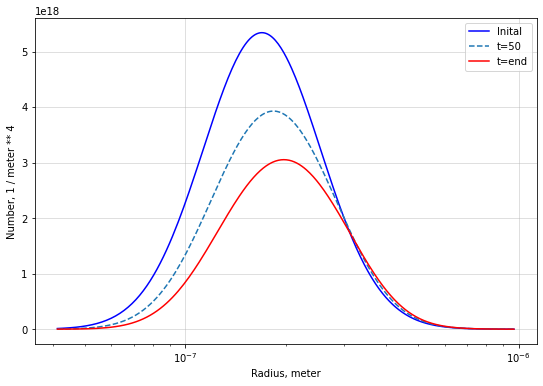

In [22]:
fig, ax= matplotlib.pyplot.subplots(1,1,figsize=[9,6])

radius = p_radius.m
ax.semilogx(radius, p_distribution_0.m, '-b', label='Inital')
ax.semilogx(radius, distribution_time[49,:], '--', label='t=50')
ax.semilogx(radius, distribution_time[-1,:], '-r', label='t=end')

ax.legend()
ax.set_ylabel(f"Number, {particle_dist2.pre_distribution().u}")
ax.set_xlabel(f"Radius, {particle_dist2.pre_radius().u}")
ax.grid(True, alpha=0.5)

## ODE solver
Instead of prescribing the time steps, which can make the problem solution unstable, lets let the code handle that with an ODE solver.

Lets import that solver class

In [17]:
from particula.util.simple_solver import SimpleSolver

Then let us run the same dynamic problem again

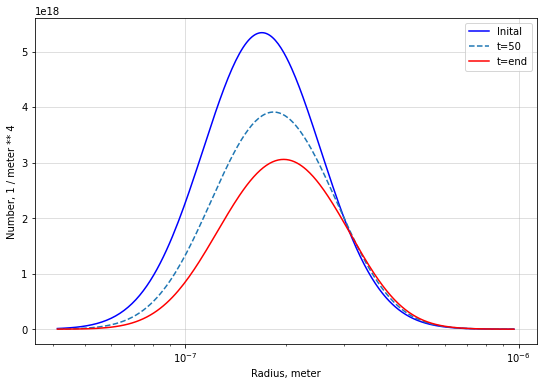

In [18]:
simple_dic_kwargs = {
    "mode": 200e-9, # 200 nm median
    "nbins": 500, # 1000 bins
    "nparticles": 1e6, # 1e4 #
    "volume": 1e-6, # per 1e-6 m^3 (or 1 cc)
    "gsigma": 1.5, # relatively narrow
}
particle_dist2 = particle.ParticleDistribution(**simple_dic_kwargs) # pass the kwargs using ** prefix

#inital distribution coag kernel
coag_kernel = full_coag(radius=particle_dist2.pre_radius())
time_array = np.arange(0, 1000, 10)

#setup the inital state of the distribution
problem = {
    "distribution": particle_dist2.pre_distribution(),
    "radius": particle_dist2.pre_radius(),
    "kernel": coag_kernel,
    "tspan": time_array
}

#call the solver
solution = SimpleSolver(**problem).solution()

#plot
fig, ax= matplotlib.pyplot.subplots(1,1,figsize=[9,6])

radius = p_radius.m
ax.semilogx(radius, particle_dist2.pre_distribution().m, '-b', label='Inital')
ax.semilogx(radius, solution.m[49,:], '--', label='t=50')
ax.semilogx(radius, solution.m[-1,:], '-r', label='t=end')

ax.legend()
ax.set_ylabel(f"Number, {particle_dist2.pre_distribution().u}")
ax.set_xlabel(f"Radius, {particle_dist2.pre_radius().u}")
ax.grid(True, alpha=0.5)


## summary on stepping
As we walked through, using the ODE solver is quite a nice way to get to the answer, without figuring out what time-step you might need.


# Fine + Coarse Mode 

Usually in the ambient air there are at least two modes of aerosol particles. Fine mode (150 nm mode) generated from atmospheric chemistry and combustion emissions. Coarse mode (10 microns mode) generated from windblown dust, sea salt, or wildfire ash.

So lets make a multi-modal distribution an progress that forward in time.

## combined distributions 
As we saw in the mulit-mode distribution call above, you can use keywards to get multiple distributions. Let's see how those fine and coarse mode distributions interact.

In [19]:
ambient_dist = {
    "mode": [100e-9, 2000e-9], # 100 nm and 2000 nm 
    "nbins": 250, # cut the bins down for speed
    "nparticles": [1e7, 1e4], # 1e4 #
    "volume": 1e-6, # per 1e-6 m^3 (or 1 cc)
    "gsigma": [1.25,1.4], # relatively narrow
    "spacing": "logspace", # bin spacing,
}

ambient_dist = particle.ParticleDistribution(**ambient_dist) 

#inital distribution coag kernel
coag_kernel = full_coag(radius=ambient_dist.pre_radius())
time_array = np.arange(0, 30*60, 1)

#setup the inital state of the distribution
problem = {
    "distribution": ambient_dist.pre_distribution(),
    "radius": ambient_dist.pre_radius(),
    "kernel": coag_kernel,
    "tspan": time_array
}

problem2 = {
    "distribution": ambient_dist.pre_distribution(),
    "radius": ambient_dist.pre_radius(),
    "kernel": coag_kernel*10, # 10x increase to approximate soot
    "tspan": time_array
}


#call the solver
solution = SimpleSolver(**problem).solution()
solution2 = SimpleSolver(**problem2).solution()




So we ran the simulation, and lets plot a couple slices for each. Solution 2 is an 10x increase in the coagulation kernel, which is a rough approximation for the coagulation enhancement due to a chain-like soot structure over the base spherical particle model.

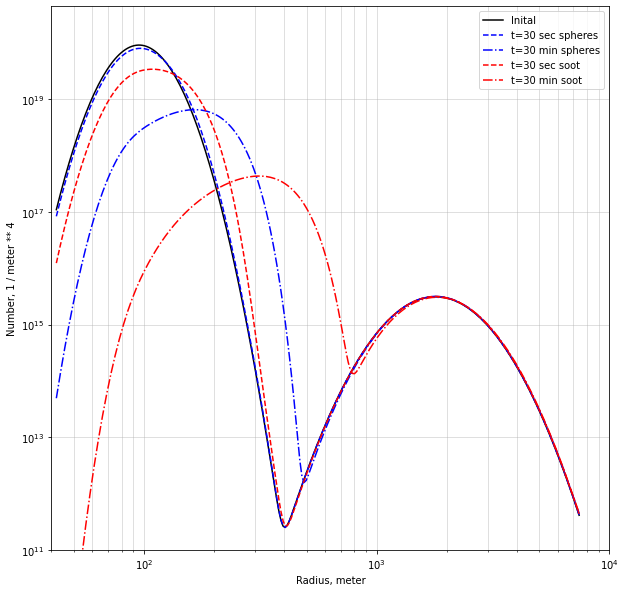

In [26]:
#plot
fig, ax= matplotlib.pyplot.subplots(1,1,figsize=[10,10])

radius = ambient_dist.pre_radius().to('nm').m
ax.loglog(radius, ambient_dist.pre_distribution().m, '-k', label='Inital')
ax.loglog(radius, solution.m[29,:], '--b', label='t=30 sec spheres')
ax.loglog(radius, solution.m[-1,:], '-.b', label='t=30 min spheres')

ax.loglog(radius, solution2.m[29,:], '--r', label='t=30 sec soot')
ax.loglog(radius, solution2.m[-1,:], '-.r', label='t=30 min soot')


ax.legend()
ax.set_ylim(bottom=1e11)
ax.set_xlim(left=40, right= 10000)
ax.set_ylabel(f"Number, {ambient_dist.pre_distribution().u}")
ax.set_xlabel(f"Radius, {ambient_dist.pre_radius().u}")
ax.grid(True, which='both', alpha=0.5)

## Number vs Time
Now lets plot the integrated number vs time. We should see the fine mode decrease, and the coarse mode increase a little depending on how fast the coagulational growth is moving the distribution. 

128


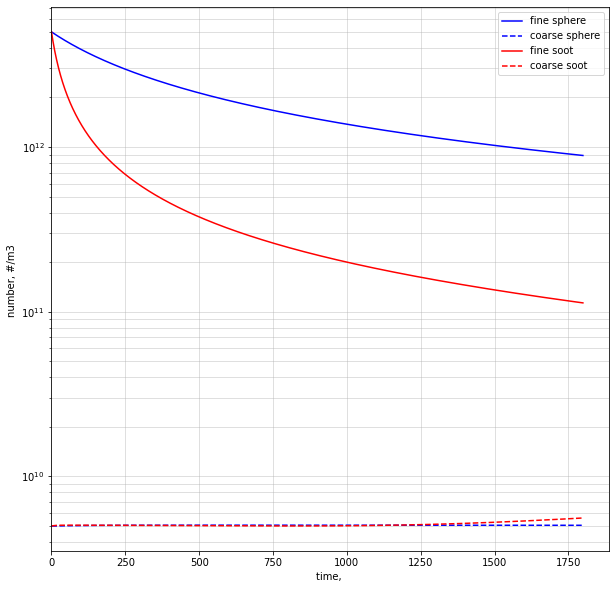

In [21]:
radius = ambient_dist.pre_radius().m
radius_withunits= ambient_dist.pre_radius()
split = 600e-9 # fine to coarse cut off we are using.

split_index = np.argmin(np.abs(radius-split))
print(split_index)

fine_mode = np.zeros_like(time_array)
coarse_mode = np.zeros_like(time_array)

fine_mode2 = np.zeros_like(time_array)
coarse_mode2 = np.zeros_like(time_array)

fine_mode_vol = np.zeros_like(time_array)
coarse_mode_vol = np.zeros_like(time_array)

for i, value in enumerate(time_array):
  fine_mode[i] = pdf_total(radius[0:split_index], solution.m[i, 0:split_index] )
  coarse_mode[i] = pdf_total(radius[split_index:-1], solution.m[i, split_index:-1] )
  fine_mode2[i] = pdf_total(radius[0:split_index], solution2.m[i, 0:split_index] )
  coarse_mode2[i] = pdf_total(radius[split_index:-1], solution2.m[i, split_index:-1] )

  fine_mode_vol[i] = pdf_volume_total(radius_withunits[0:split_index], solution[i, 0:split_index] )
  coarse_mode_vol[i] = pdf_volume_total(radius_withunits[split_index:-1], solution[i, split_index:-1] )

fig, ax= matplotlib.pyplot.subplots(1,1,figsize=[10,10])

ax.semilogy(time_array, fine_mode, '-b', label='fine sphere')
ax.semilogy(time_array, coarse_mode, '--b', label='coarse sphere')

ax.semilogy(time_array, fine_mode2, '-r', label='fine soot')
ax.semilogy(time_array, coarse_mode2, '--r', label='coarse soot')

ax.legend()
ax.set_xlim(left=0)
ax.set_ylabel(f"number, #/m3 ")
ax.set_xlabel(f"time, ")
ax.grid(True, which='both', alpha=0.5)

fig.savefig('coagulation_number.png')
fig.savefig('coagulation_number.pdf')

#Summary
So we covered how to make a distribution, and how to progress a distribution forward in time with coagulation. This is just one of the three key processes (nucleation, condensation, and coagulation) happening to particles in the atmosphere; all of which can be simulated with `Particula`! 